In [1]:
!pip install torch torchvision numpy tqdm matplotlib pillow


In [2]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from model import Glow 


In [3]:
class CelebADataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith('.jpg')]
        print(f"Found {len(self.image_files)} images in {root_dir}")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        return image


In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

image_dir = 'C://Users//anujb//glow-pytorch//celeba-64//50k'  # Modify this to your dataset path

dataset = CelebADataset(root_dir=image_dir, transform=transform)

if len(dataset) > 0:
    dataloader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=0)
    print(f"Created dataloader with {len(dataset)} images")
else:
    raise ValueError("No images found in the dataset directory!")


Found 50000 images in C://Users//anujb//glow-pytorch//celeba-64//50k
Created dataloader with 50000 images


In [5]:
# Hyperparameters for the model
img_size = 64
n_channel = 3
n_flow = 16
n_block = 3
affine = True
conv_lu = True

model = Glow(
    n_channel,
    n_flow,
    n_block,
    affine=affine,
    conv_lu=conv_lu
)

# Move model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [7]:
def train(model, dataloader, optimizer, n_epochs=10):
    model.train()

    for epoch in range(n_epochs):
        print(f"Epoch {epoch+1}/{n_epochs}")
        epoch_loss = 0

        pbar = tqdm(dataloader)
        for i, img in enumerate(pbar):
            img = img.to(device)

            log_p, logdet, _ = model(img)

            loss = -log_p - logdet
            loss = loss.mean()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

            pbar.set_description(f"Loss: {loss.item():.4f}")

            """# Save intermediate model checkpoint every 500 iterations
            if i % 500 == 0:
                torch.save(
                    {'model': model.state_dict(), 'optimizer': optimizer.state_dict()},
                    f'checkpoint_epoch{epoch+1}_iter{i}.pt'
                )

        # Save model after each epoch
        torch.save(
            {'model': model.state_dict(), 'optimizer': optimizer.state_dict()},
            f'checkpoint_epoch{epoch+1}.pt'
        )

        print(f"Epoch {epoch+1} average loss: {epoch_loss/len(dataloader):.4f}")"""
        
    torch.save(
        {'model': model.state_dict(), 'optimizer': optimizer.state_dict()},
        'glow_final_model_more_epochs.pt'
    )
    print("Final model saved to glow_final_model.pt")

In [8]:
n_epochs = 50  # Set the number of epochs
train(model, dataloader, optimizer, n_epochs)

Epoch 1/50


Loss: -33849.4883: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:16<00:00,  3.41it/s]


Epoch 2/50


Loss: -34685.6875: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:14<00:00,  3.42it/s]


Epoch 3/50


Loss: -35562.6055: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:12<00:00,  3.42it/s]


Epoch 4/50


Loss: -36623.5078: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:13<00:00,  3.42it/s]


Epoch 5/50


Loss: -37335.7383: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:08<00:00,  3.44it/s]


Epoch 6/50


Loss: -37374.1680: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:14<00:00,  3.42it/s]


Epoch 7/50


Loss: -37101.4453: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:08<00:00,  3.44it/s]


Epoch 8/50


Loss: -38062.0977: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:11<00:00,  3.43it/s]


Epoch 9/50


Loss: -37815.0859: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:09<00:00,  3.43it/s]


Epoch 10/50


Loss: -38270.9297: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:13<00:00,  3.42it/s]


Epoch 11/50


Loss: -39549.2266: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:12<00:00,  3.42it/s]


Epoch 12/50


Loss: -39393.6758: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:15<00:00,  3.41it/s]


Epoch 13/50


Loss: -40038.5156: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:11<00:00,  3.43it/s]


Epoch 14/50


Loss: -38536.3203: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:15<00:00,  3.41it/s]


Epoch 15/50


Loss: -39237.6328: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:12<00:00,  3.42it/s]


Epoch 16/50


Loss: -39609.7773: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:13<00:00,  3.42it/s]


Epoch 17/50


Loss: -38408.8125: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:13<00:00,  3.42it/s]


Epoch 18/50


Loss: -39008.3750: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:13<00:00,  3.42it/s]


Epoch 19/50


Loss: -40367.0117: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:09<00:00,  3.44it/s]


Epoch 20/50


Loss: -39355.4219: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:07<00:00,  3.44it/s]


Epoch 21/50


Loss: -39745.1719: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:11<00:00,  3.43it/s]


Epoch 22/50


Loss: -39770.3281: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:10<00:00,  3.43it/s]


Epoch 23/50


Loss: -39905.8320: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:08<00:00,  3.44it/s]


Epoch 24/50


Loss: -39421.6016: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:11<00:00,  3.43it/s]


Epoch 25/50


Loss: -41147.8789: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:12<00:00,  3.42it/s]


Epoch 26/50


Loss: -39689.4375: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:06<00:00,  3.45it/s]


Epoch 27/50


Loss: -40619.5625: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:09<00:00,  3.43it/s]


Epoch 28/50


Loss: -39886.7148: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:06<00:00,  3.45it/s]


Epoch 29/50


Loss: -40354.4805: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:05<00:00,  3.45it/s]


Epoch 30/50


Loss: -40673.9219: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:10<00:00,  3.43it/s]


Epoch 31/50


Loss: -41326.7070: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:09<00:00,  3.44it/s]


Epoch 32/50


Loss: -40730.8906: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:06<00:00,  3.45it/s]


Epoch 33/50


Loss: -40122.1719: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:05<00:00,  3.45it/s]


Epoch 34/50


Loss: -40486.6016: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:04<00:00,  3.46it/s]


Epoch 35/50


Loss: -40267.7695: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:08<00:00,  3.44it/s]


Epoch 36/50


Loss: -40118.8359: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:09<00:00,  3.44it/s]


Epoch 37/50


Loss: -41153.7656: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:05<00:00,  3.45it/s]


Epoch 38/50


Loss: -41418.6875: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:06<00:00,  3.45it/s]


Epoch 39/50


Loss: -40767.7656: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:08<00:00,  3.44it/s]


Epoch 40/50


Loss: -42506.3125: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:08<00:00,  3.44it/s]


Epoch 41/50


Loss: -41017.9844: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:05<00:00,  3.45it/s]


Epoch 42/50


Loss: -40665.4375: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:05<00:00,  3.45it/s]


Epoch 43/50


Loss: -40496.3164: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:06<00:00,  3.45it/s]


Epoch 44/50


Loss: -41678.7422: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:05<00:00,  3.45it/s]


Epoch 45/50


Loss: -39711.1367: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:09<00:00,  3.44it/s]


Epoch 46/50


Loss: -41026.9062: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:08<00:00,  3.44it/s]


Epoch 47/50


Loss: -41206.5234: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:07<00:00,  3.44it/s]


Epoch 48/50


Loss: -42147.0703: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:09<00:00,  3.44it/s]


Epoch 49/50


Loss: -41784.4258: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:07<00:00,  3.44it/s]


Epoch 50/50


Loss: -40809.3984: 100%|███████████████████████████████████████████████████████████| 3125/3125 [15:10<00:00,  3.43it/s]


✅ Final model saved to glow_final_model.pt


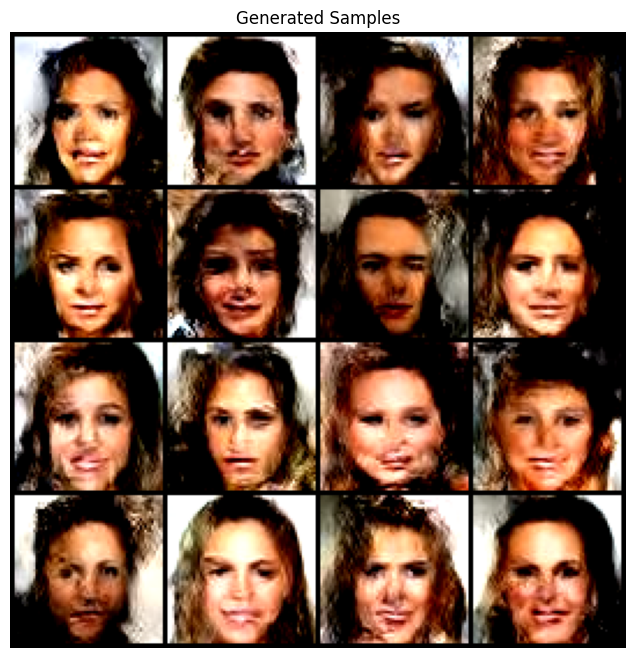

In [29]:
import torch
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from model import Glow

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def calc_z_shapes(n_channel, input_size, n_flow, n_block):
    z_shapes = []
    for i in range(n_block - 1):
        input_size //= 2
        n_channel *= 2
        z_shapes.append((n_channel, input_size, input_size))
    input_size //= 2
    z_shapes.append((n_channel * 4, input_size, input_size))
    return z_shapes

def load_model(path, n_flow=16, n_block=3, affine=True, conv_lu=True):
    model = Glow(3, n_flow, n_block, affine=affine, conv_lu=conv_lu).to(device)
    checkpoint = torch.load(path, map_location=device)
    model.load_state_dict(checkpoint['model'])
    model.eval()
    return model

def generate_z_samples(z_shapes, n_sample=16, temperature=0.7):
    z_sample = []
    for shape in z_shapes:
        z = torch.randn(n_sample, *shape).to(device) * temperature
        z_sample.append(z)
    return z_sample

def show_images(images, save_path=None):
    images = (images + 0.5).clamp(0, 1)
    grid = vutils.make_grid(images.cpu(), nrow=4)
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title("Generated Samples")
    plt.imshow(grid.permute(1, 2, 0))
    if save_path:
        plt.savefig(save_path)
    plt.show()

# ------------------------ USE HERE ------------------------

n_flow = 16
n_block = 3
img_size = 64
model_path = "glow_final_model_more_epochs.pt"

model = load_model(model_path, n_flow=n_flow, n_block=n_block)
z_shapes = calc_z_shapes(3, img_size, n_flow, n_block)

# Generate and reverse
z_sample = generate_z_samples(z_shapes, n_sample=16, temperature=0.6)
with torch.no_grad():
    samples = model.reverse(z_sample)

# Display
show_images(samples, save_path="generated_samples.png")
